In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('international-airline-passengers.csv')

In [3]:
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
# data.columns = ['Month', 'Passengers']
# data.head()
data.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60' : 'Passengers'}, inplace=True)
data.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0                                              112.0                             
1                                              118.0                             
2                                              132.0                             
3                                              129.0                             
4                                              121.0                             


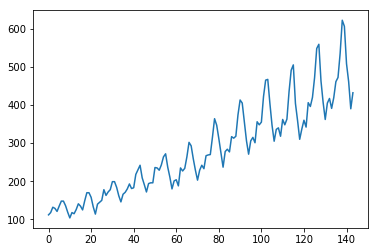

In [32]:
dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1])
print(dataset.head())
plt.plot(dataset)
plt.show()

In [33]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [34]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
print('train_size', train_size)
test_size = len(dataset) - train_size
print('test_size', test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

train_size 97
test_size 48
97 48


In [35]:
# print(dataset)

In [36]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [37]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [39]:
look_back

10

In [40]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=100, batch_size=2, verbose=2)

C:\Users\Admin\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
 - 0s - loss: 96952.2487
Epoch 2/100
 - 0s - loss: 25067.1917
Epoch 3/100
 - 0s - loss: 4210.6919
Epoch 4/100
 - 0s - loss: 1437.1759
Epoch 5/100
 - 0s - loss: 1342.4802
Epoch 6/100
 - 0s - loss: 1334.5820
Epoch 7/100
 - 0s - loss: 1301.8872
Epoch 8/100
 - 0s - loss: 1305.4819
Epoch 9/100
 - 0s - loss: 1296.8988
Epoch 10/100
 - 0s - loss: 1281.3429
Epoch 11/100
 - 0s - loss: 1264.7753
Epoch 12/100
 - 0s - loss: 1279.2113
Epoch 13/100
 - 0s - loss: 1281.7626
Epoch 14/100
 - 0s - loss: 1241.1616
Epoch 15/100
 - 0s - loss: 1231.3567
Epoch 16/100
 - 0s - loss: 1251.4043
Epoch 17/100
 - 0s - loss: 1213.0930
Epoch 18/100
 - 0s - loss: 1210.6694
Epoch 19/100
 - 0s - loss: 1213.3263
Epoch 20/100
 - 0s - loss: 1192.6628
Epoch 21/100
 - 0s - loss: 1165.2192
Epoch 22/100
 - 0s - loss: 1181.1464
Epoch 23/100
 - 0s - loss: 1158.2428
Epoch 24/100
 - 0s - loss: 1165.3924
Epoch 25/100
 - 0s - loss: 1165.7036
Epoch 26/100
 - 0s - loss: 1124.4236
Epoch 27/100
 - 0s - loss: 1116.1681
Epoch 28

In [41]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)',  (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)',  (testScore, math.sqrt(testScore)))

Train Score: %.2f MSE (%.2f RMSE) (537.4919603924419, 23.18387285145521)
Test Score: %.2f MSE (%.2f RMSE) (2276.080863334037, 47.70828925180651)


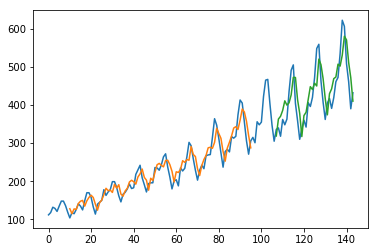

In [42]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()